In [2]:
!pip install autoscraper

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=b5d8cb1b1076beeeb356df2c5b980a1cec1d3e291330d717b78b32ffab048e23
  Stored in directory: c:\users\91882\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [36]:
from autoscraper import AutoScraper
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
amazon_url = "https://www.amazon.in/Rockerz-510-Wireless-Bluetooth-Headphones/product-reviews/B06Y5LK5QJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

wanted_list = ["It's really a value for money product. But in the sale of Amazon it's looking costly compared to other as Flipcart. In great Indian festival its lowest price is ₹1,849/- but in Flipcart big billion days its lowest price is only ₹1,499/- . It's the difference."]

In [11]:
scraper = AutoScraper()

In [12]:
result = scraper.build(amazon_url,wanted_list)
print(result)

["Its one of the best headphones for this price( i bought it for 2k). It has super powerful bass and clear sound quality. It can be used either using Bluetooth or it can be wired. It is compatible for Android, ios and for PC or laptops. This headphone is for serious music lovers who love extra bass and it is also good for watching movies or for gaming. It has many buttons so i don't have to take my phone at all. Finally i would suggest people to buy this rather than buying boAt rockerz 400.", "So allow me write a very technical and accurate review about the amazing Boat 510.Amazon was as usual on time and excellent with the delivery of the product.Now the thing about the headphones isThey work extremely fine while on Bluetooth.I have tried with my pc and some mobiles the sound quality is uncompromised even during the low volume. The bass is very noticeable.As soon ass you plug in the jack in your device, the bass is lost/reduced. The headphones will start sounding flat. With only the h

In [13]:
import pandas as pd

In [14]:
review_headphone = pd.DataFrame(result,columns=['reviews'])

In [15]:
review_headphone

,reviews
0,Its one of the best headphones for this price(...
1,So allow me write a very technical and accurat...
2,It's really a value for money product. But in ...
3,This is a 30 day review from my side so if you...
4,about a year after purchase first the battery ...
5,"Made it China! Warranty is just on paper,they ..."
6,Well if you're looking for a decent gaming hea...
7,"First of all, the after sale service is very v..."
8,I got it for 1300 after many discounts....Seri...
9,Now I don't know much about bass and treble an...


In [16]:
import re

In [20]:
def cleantxt(text):
    text = re.sub('@[A-Za-z0-9]+','',text)
    text = text.lower()
    return text

In [21]:
review_headphone['reviews'] = review_headphone['reviews'].apply(cleantxt)

In [22]:
review_headphone

,reviews
0,its one of the best headphones for this price(...
1,so allow me write a very technical and accurat...
2,it's really a value for money product. but in ...
3,this is a 30 day review from my side so if you...
4,about a year after purchase first the battery ...
5,"made it china! warranty is just on paper,they ..."
6,well if you're looking for a decent gaming hea...
7,"first of all, the after sale service is very v..."
8,i got it for 1300 after many discounts....seri...
9,now i don't know much about bass and treble an...


In [23]:
review_headphone.shape

(10, 1)

In [24]:
from nltk.stem import WordNetLemmatizer

In [25]:
from nltk.corpus import stopwords

In [26]:
stop = stopwords.words('english')
lemma = WordNetLemmatizer()

In [28]:
review_headphone['reviews'] = review_headphone['reviews'].apply(lambda x: " ".join([lemma.lemmatize(word) for word in x.split() if word not in (stop)]))

In [29]:
review_headphone

,reviews
0,one best headphone price( bought 2k). super po...
1,allow write technical accurate review amazing ...
2,really value money product. sale amazon lookin...
3,30 day review side really planning buy product...
4,year purchase first battery stopped charging b...
5,"made china! warranty paper,they seem work real..."
6,well looking decent gaming headphone product o...
7,"first all, sale service poor, i've issue heads..."
8,"got 1300 many discounts....seriously, best wan..."
9,know much bass treble stuff headphone pretty g...


In [31]:
def Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [33]:
review_headphone['subjectivity'] = review_headphone['reviews'].apply(Subjectivity)
review_headphone['polarity']=review_headphone['reviews'].apply(polarity)

In [34]:
review_headphone

,reviews,subjectivity,polarity
0,one best headphone price( bought 2k). super po...,0.555128,0.246154
1,allow write technical accurate review amazing ...,0.411354,0.191771
2,really value money product. sale amazon lookin...,0.350000,0.333333
3,30 day review side really planning buy product...,0.503472,0.313542
4,year purchase first battery stopped charging b...,0.333333,0.250000
5,"made china! warranty paper,they seem work real...",0.560000,0.482500
6,well looking decent gaming headphone product o...,0.515556,0.022222
7,"first all, sale service poor, i've issue heads...",0.529167,0.026562
8,"got 1300 many discounts....seriously, best wan...",0.498485,0.095455
9,know much bass treble stuff headphone pretty g...,0.732051,0.300000


<function matplotlib.pyplot.show(close=None, block=None)>

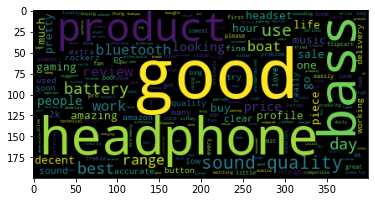

In [37]:
words = ''.join([review for review in review_headphone['reviews']])
wordcloud = WordCloud().generate(words)
plt.imshow(wordcloud)
plt.show

In [38]:
def getAnalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

In [39]:
review_headphone['analysis']=review_headphone['polarity'].apply(getAnalysis)

In [40]:
review_headphone

,reviews,subjectivity,polarity,analysis
0,one best headphone price( bought 2k). super po...,0.555128,0.246154,positive
1,allow write technical accurate review amazing ...,0.411354,0.191771,positive
2,really value money product. sale amazon lookin...,0.350000,0.333333,positive
3,30 day review side really planning buy product...,0.503472,0.313542,positive
4,year purchase first battery stopped charging b...,0.333333,0.250000,positive
5,"made china! warranty paper,they seem work real...",0.560000,0.482500,positive
6,well looking decent gaming headphone product o...,0.515556,0.022222,positive
7,"first all, sale service poor, i've issue heads...",0.529167,0.026562,positive
8,"got 1300 many discounts....seriously, best wan...",0.498485,0.095455,positive
9,know much bass treble stuff headphone pretty g...,0.732051,0.300000,positive


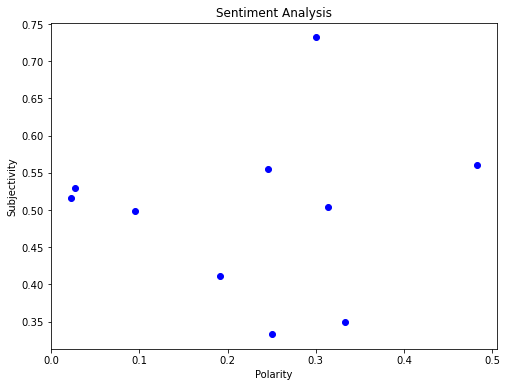

In [45]:
plt.figure(figsize=(8,6))
for i in range(0,review_headphone.shape[0]):
    plt.scatter(review_headphone['polarity'][i],review_headphone['subjectivity'][i],color="Blue")
    plt.title('Sentiment Analysis')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')

Text(0.5, 1.0, 'Sentiment Analysis')

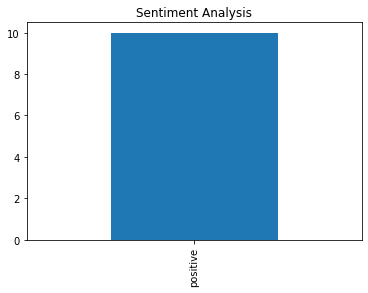

In [46]:
review_headphone['analysis'].value_counts().plot(kind='bar')
plt.show
plt.title('Sentiment Analysis')